<a href="https://colab.research.google.com/github/ucheokechukwu/zero_to_mastery_courses/blob/main/Pytorch_For_Deep_Learning/04_Pytorch_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

https://www.learnpytorch.io/04_pytorch_custom_datasets/

https://github.com/mrdbourke/pytorch-deep-learning/tree/main

- getting custom datasets
- transforming data
- exploratory data analysis
- loading custom data with prebuilt and custom functions
- build the FoodVision Models
- compare models with./without data augmentation
- make predictions

# import libraries and set up device-agnostic code

In [1]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Getting the data



dataset is a subset of Food101 dataset.

Food101 has 101 different classes of food and 1000 images per class (750 training and 250 testing).

our dataset has 3 classes of food and 10% of images (~75 training and ~25 testing)



In [2]:
import requests
import zipfile
from pathlib import Path

# set up path to the data folder
data_path = Path('data')
image_path = data_path / 'pizza_steak_sushi'

# if the image folder doesn't exist, download it and prepare it...

if image_path.is_dir():
    print(f'{image_path} directory already exists... skipping download....')
else:
    print(f'{image_path} directory does not exist... creating... ')
    image_path.mkdir(parents=True, exist_ok=True)

data/pizza_steak_sushi directory does not exist... creating... 


In [3]:
# download pizza, steak and sushi data from github
with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print('Downloading pizza, steak, sushi data...')
    f.write(request.content)

# unzip data
with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip', 'r') as zip_ref:
    print('unzipping pizza, steak, sushi data')
    zip_ref.extractall(image_path)


unzipping pizza, steak, sushi data


# Exploring and preparing the data

In [4]:
import os
def walk_through_dir(dir_path):
    """walks through the dir_path returning its contents"""
    for dirpath, dirname, filenames in os.walk(dir_path):
        print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath}")

In [5]:
next(os.walk('sample_data'))

('sample_data',
 [],
 ['anscombe.json',
  'README.md',
  'california_housing_train.csv',
  'mnist_train_small.csv',
  'california_housing_test.csv',
  'mnist_test.csv'])

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak


* this is the standard image classification directory structure. put the images of the same class inside on directory named with the class name

* this is based on https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html

In [7]:
# set up training and testing path
train_dir = image_path /'train'
test_dir = image_path /'test'

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## Visualizing the images

1. get all the image paths
2. pick a random image path using `random.choice()`
3. get an image class name using `pathlib.Path.parent.stem`
4. open the image with Python Pillow (PIL)
5. show the image and print metadata

### visualizing with `PIL.Image()`

In [8]:
image_path, type((image_path.glob("")))

(PosixPath('data/pizza_steak_sushi'), generator)

In [9]:
import random
from PIL import Image

# 1. get all the image paths note the format passed to glob
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list


[PosixPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/648055.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/344397.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/714866.jpg'),
 PosixPath('data/pizza_steak

Random image path: data/pizza_steak_sushi/train/sushi/121940.jpg
Image class: sushi
Image height: 382
Image width: 512


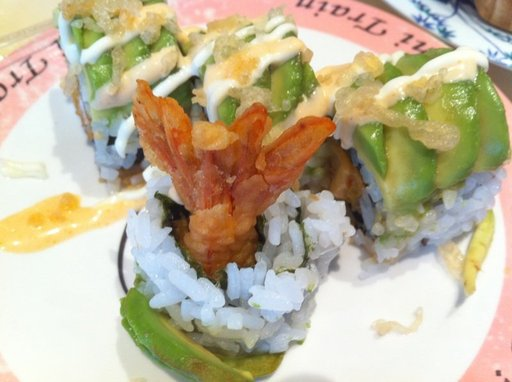

In [10]:
# 2. pick a random image path
# set seed
# random.seed(42)
random_image_path = random.choice(image_path_list)

# 3. get the image clas
image_class = random_image_path.parent.stem

# 4. open the image with PIL
img = Image.open(random_image_path)

# 5. print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
display(img)

### visualizing with matplotlib

(-0.5, 511.5, 381.5, -0.5)

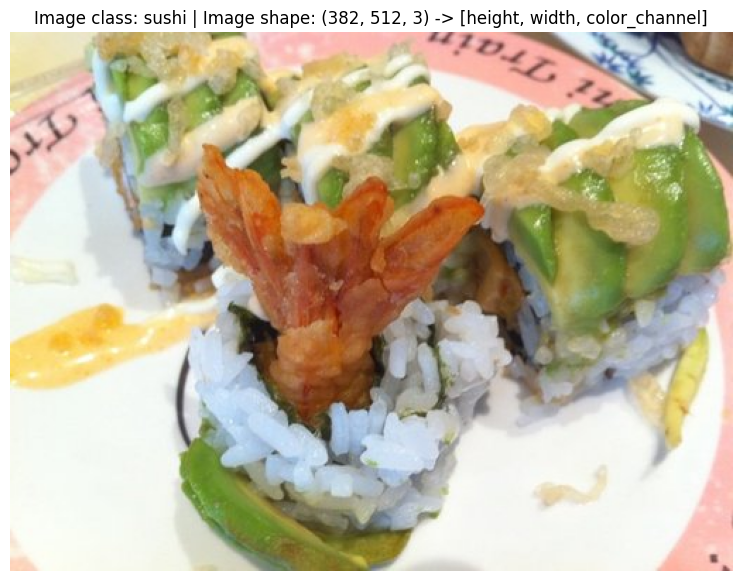

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# turn the image into an array
img_as_array = np.asarray(img)
# plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f'Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channel]')
plt.axis(False)

In [12]:
img.size, img_as_array

((512, 382),
 array([[[236, 232, 185],
         [237, 233, 186],
         [238, 234, 187],
         ...,
         [131,  90,  62],
         [127,  86,  58],
         [128,  87,  59]],
 
        [[236, 232, 185],
         [237, 233, 186],
         [238, 234, 187],
         ...,
         [131,  90,  62],
         [127,  86,  58],
         [126,  85,  57]],
 
        [[236, 232, 185],
         [236, 232, 185],
         [237, 233, 186],
         ...,
         [133,  92,  62],
         [130,  89,  59],
         [126,  85,  55]],
 
        ...,
 
        [[253, 209, 184],
         [253, 211, 186],
         [255, 212, 185],
         ...,
         [249, 194, 187],
         [255, 202, 195],
         [251, 196, 189]],
 
        [[251, 209, 184],
         [252, 212, 186],
         [254, 212, 187],
         ...,
         [212, 159, 153],
         [245, 192, 186],
         [254, 201, 195]],
 
        [[253, 213, 187],
         [254, 214, 188],
         [255, 215, 189],
         ...,
         [184, 

## Transforming data with `torchvision.transforms`

Before we can use our image data with Pytorch:
1. turn target data into tensors
2. turn into a `torch.utils.data.Dataset`
3. turn into a `torch.utils.data.DataLoader`

In [13]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [14]:
# write a transform for image
data_transform = transforms.Compose( # or nn.Sequential()
    [
        # resize our images to 64x64
        transforms.Resize(size=(64,64)),
        # flip the images randomly on horizontal (adding diversity to th edata)
        transforms.RandomHorizontalFlip(p=0.5),
        # turn the image into a torch tensor
        transforms.ToTensor(),
    ]
)

In [15]:
data_transform(img), data_transform(img).shape, data_transform(img).dtype

(tensor([[[0.5608, 0.6196, 0.5686,  ..., 0.9333, 0.9333, 0.9333],
          [0.5608, 0.6078, 0.5451,  ..., 0.9333, 0.9373, 0.9412],
          [0.5451, 0.5804, 0.5373,  ..., 0.9373, 0.9373, 0.9451],
          ...,
          [0.9882, 0.9647, 0.9843,  ..., 0.9882, 0.9882, 0.9843],
          [0.9804, 0.8196, 0.9451,  ..., 0.9922, 0.9843, 0.9882],
          [0.8824, 0.9333, 0.9843,  ..., 0.9882, 0.9882, 0.9922]],
 
         [[0.4157, 0.5059, 0.4392,  ..., 0.8980, 0.9098, 0.9137],
          [0.4235, 0.5020, 0.4196,  ..., 0.8980, 0.9020, 0.9098],
          [0.4078, 0.4706, 0.4118,  ..., 0.8941, 0.8980, 0.9098],
          ...,
          [0.7882, 0.7843, 0.7882,  ..., 0.9922, 0.9804, 0.9451],
          [0.7882, 0.6275, 0.7216,  ..., 0.9843, 0.9176, 0.8863],
          [0.6706, 0.7020, 0.7412,  ..., 0.9490, 0.8510, 0.8353]],
 
         [[0.2980, 0.4078, 0.3333,  ..., 0.7451, 0.7529, 0.7373],
          [0.3020, 0.3922, 0.3059,  ..., 0.7176, 0.7216, 0.7216],
          [0.2980, 0.3569, 0.2941,  ...,

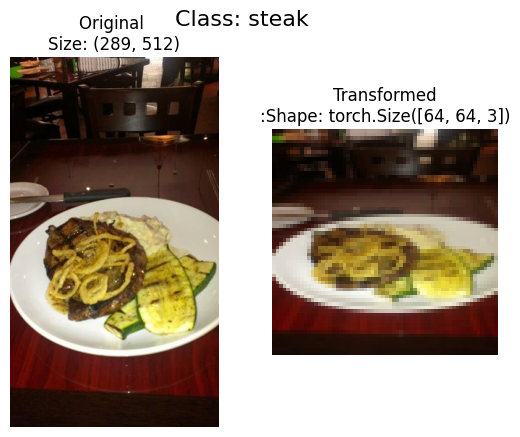

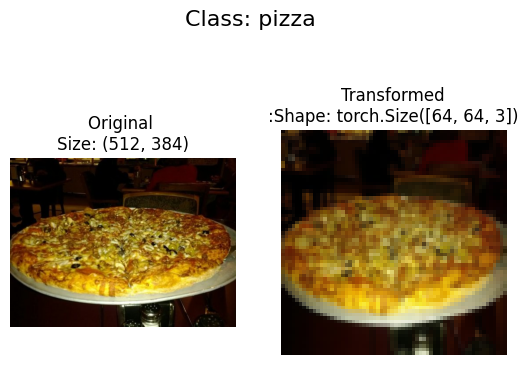

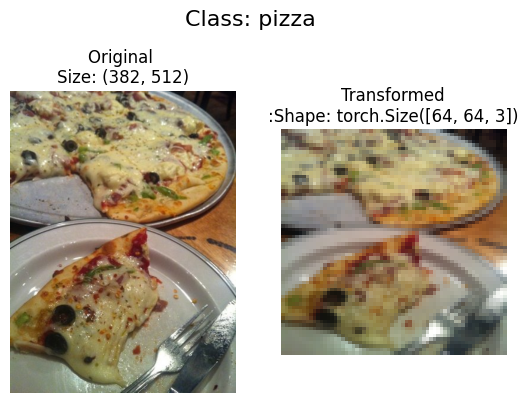

In [16]:
def plot_transformed_images(image_paths,
                            transform,
                            n=3,
                            seed=42):
    """select random images from a path of images and loads/transforms them
    then plots the original vs the transformed images"""

    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis(False)

            # transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0) # to put the color-channels last
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\n:Shape: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

### Option 1: Loading image data using `ImageFolder`

https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html

- this is a prebuilt dataset function.

In [17]:
# Use ImageFolder to create datasets

from torchvision import datasets
train_data = datasets.ImageFolder(
    root = train_dir,
    transform = data_transform, # a transform for the data
    target_transform = None # a transform for the label
)
test_data = datasets.ImageFolder(
    root=test_dir,
    transform=data_transform,
)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [18]:
## checking out the attributes of the

# get class names as a list
class_names = train_data.classes
print(f"Class names as a list: {class_names}")
# get class names as a dict
class_dict = train_data.class_to_idx
print(f"Class names as a dictionary: {class_dict}")
# check the lengths of our dataset
print(f"Length of train data: {len(train_data)}. \tLength of test data: {len(test_data)}")

train_data.samples[0]


Class names as a list: ['pizza', 'steak', 'sushi']
Class names as a dictionary: {'pizza': 0, 'steak': 1, 'sushi': 2}
Length of train data: 225. 	Length of test data: 75


('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [19]:
train_data[224]

(tensor([[[0.2941, 0.2824, 0.2314,  ..., 0.0039, 0.0039, 0.0078],
          [0.3490, 0.3020, 0.2549,  ..., 0.0196, 0.0196, 0.0235],
          [0.8353, 0.7451, 0.6196,  ..., 0.0392, 0.0353, 0.0392],
          ...,
          [0.0941, 0.0941, 0.0980,  ..., 0.8588, 0.8588, 0.8549],
          [0.0941, 0.0941, 0.0941,  ..., 0.8588, 0.8588, 0.8588],
          [0.0980, 0.0941, 0.0980,  ..., 0.8549, 0.8549, 0.8471]],
 
         [[0.2431, 0.2314, 0.1882,  ..., 0.0235, 0.0235, 0.0275],
          [0.3137, 0.2588, 0.2118,  ..., 0.0353, 0.0353, 0.0392],
          [0.8431, 0.7451, 0.6039,  ..., 0.0471, 0.0471, 0.0471],
          ...,
          [0.0941, 0.0941, 0.0980,  ..., 0.8275, 0.8275, 0.8314],
          [0.0941, 0.0941, 0.0941,  ..., 0.8275, 0.8275, 0.8275],
          [0.0980, 0.0941, 0.0980,  ..., 0.8235, 0.8196, 0.8157]],
 
         [[0.1529, 0.1412, 0.1255,  ..., 0.0078, 0.0078, 0.0118],
          [0.2392, 0.1882, 0.1529,  ..., 0.0196, 0.0196, 0.0275],
          [0.8118, 0.7137, 0.5686,  ...,

#### Visualizing

In [20]:
type(train_data)

torchvision.datasets.folder.ImageFolder

In [21]:
img, label = train_data[0]
print(f"Image tensor: \n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: class_names[label]")
print(f"Image label dataype: {type(label)}")

Image tensor: 
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color channels, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, color channel]


Text(0.5, 1.0, 'pizza')

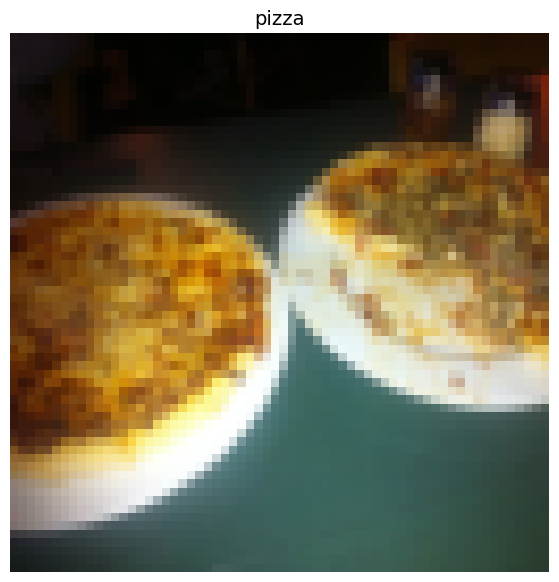

In [22]:
# rearranging hte dimensions
img_permute = img.permute(1,2,0)

# print out different shapes
print(f"Original shape: {img.shape} -> [color channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color channel]")

# plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label], fontsize=14)

#### Turn images into Dataloaders

A `Dataloader` will help us turn our datasets into iterables, and we can customize the batch size.

In [23]:
import os
os.cpu_count()

2

In [24]:
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True,
                              num_workers=os.cpu_count())

test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             num_workers = os.cpu_count())
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a9c7c766320>,
 <torch.utils.data.dataloader.DataLoader at 0x7a9c81db94b0>)

In [25]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [26]:
type(train_data), type(train_dataloader)

(torchvision.datasets.folder.ImageFolder,
 torch.utils.data.dataloader.DataLoader)

In [27]:
batch_sample = next(iter(train_dataloader))
batch_imgs, batch_labels = batch_sample
display(len(batch_imgs), len(batch_labels))
print(f"image shape: {batch_imgs.shape}")
print(f"label_shape: {batch_labels.shape}")

32

32

image shape: torch.Size([32, 3, 64, 64])
label_shape: torch.Size([32])


### Option 2: Loading data with custom `Dataset`

- what if the prebuilt ImageFolder did not exist?
- we need to create our own dataloading class...

Should be able to:
1. load images from file
2. get class names from the Dataset
3. get classes as a Dict

Pros:
1. can create a Dataset out of almost anything
2. not limited to the prebuilt functions

Cons:
1. it might not work
2. writing more code (with bugs)


In [28]:
import os
import pathlib
import torch
from PIL import Image

from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

#### Creating a helper function to get class names

1. get the class names using `os.scandir()` to traverse a target directory  (ideally the directory is in standard image classification format).

2. raise an error if the class names aren't found

3. turn the class names into a dict and a list and return them.


In [29]:
# setup path for target directory
target_directory = train_dir
print(f"Target dir:  {target_directory}")

# get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir:  data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [30]:
directory = list(os.scandir(target_directory))[0]
type(directory)

posix.DirEntry

In [31]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Find the class folder names in a target directory
    """
    # get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    # raise error if the class names cannot be found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check the file structure.")
    # create a dictionary of index labels (computers prefer numbers over strings as labels)
    classes_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes, classes_to_idx
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

#### Create a custom `Dataset` to replicate `ImageFolder

1. subclass `torch.utils.data.Dataset`

2. init subclass with a target directory (directory we want to get data from), as well as transform (if we want to transform the data).

3. create several attributes:
    * paths - paths of our images
    * transform - the transform we want to use
    * classes - a list of the target classes
    * class_to_idx - a dict of the target classes mapped ot integer labels

4. create a function to `load images()` - it will open an image

5. overwrite `__len__()` -  to return thelength of the dataset, which is supposed to return the size of the dataset by many `Sampler` implementations or the default option of `DataLoader`.

6. overwrite `__getitem__()`, to return a given sample when passed an index. This replicates this function: `img, label = train_data[0]`



In [32]:
# write a custom dataset
from torch.utils.data import Dataset
from pathlib import Path

# 1. subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    # 2. initialize our custom dataset
    def __init__(self, targ_dir: str, transform=None):
        # 3. create class attributes
        # get all the image paths
        self.paths = list(Path(targ_dir).glob('*/*.jpg'))
        # set up transform
        self.transform = transform
        # classes
        self.classes, self.class_to_idx = find_classes(targ_dir)
    # 4. create function to load images
    def load_images(self, index: int) -> Image.Image:
        """Opens an image via a path and returns it"""
        image_path = self.paths[index]
        return Image.open(image_path)
    # 5. overwrite the __len__() method
    def __len__(self) -> int:
        """returns the total number of samples."""
        return len(self.paths)
    # 6. overwrite the __getitem()___ method
    def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
        """returns one sample of data, data and label (X,y)"""
        img = self.load_images(index)
        class_name = self.paths[index].parent.name # expect path in the format: data_folder / class_name / image.jpg
        # class_name = self.paths[index].parts[-2] # should also work
        label = self.class_to_idx[class_name]
        # Transform if necessary
        if self.transform:
            return self.transform(img), label # return data, label (X,y)
        else:
            return img, label

In [33]:
# create a transform
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64,)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [34]:
# test our ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir = train_dir,
                                      transform = train_transforms)
test_data_custom = ImageFolderCustom(targ_dir = test_dir,
                                    transform = test_transforms)

train_data_custom, test_data_custom, train_data, test_data

(<__main__.ImageFolderCustom at 0x7a9c7c51ae60>,
 Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [35]:
len(train_data_custom), len(train_data)

(225, 225)

In [36]:
train_data_custom.classes, train_data.classes, train_data_custom.class_to_idx, train_data.class_to_idx

(['pizza', 'steak', 'sushi'],
 ['pizza', 'steak', 'sushi'],
 {'pizza': 0, 'steak': 1, 'sushi': 2},
 {'pizza': 0, 'steak': 1, 'sushi': 2})

In [37]:
# check for equality between original dataset and custom dataset
train_data_custom.classes == train_data.classes, test_data_custom.classes == test_data.classes

(True, True)

In [38]:
train_data_custom[0]

(tensor([[[0.3961, 0.4549, 0.4471,  ..., 0.1098, 0.3333, 0.4196],
          [0.4118, 0.4157, 0.4627,  ..., 0.0824, 0.1961, 0.4118],
          [0.4863, 0.3765, 0.4235,  ..., 0.0824, 0.0980, 0.3098],
          ...,
          [0.6902, 0.6941, 0.7098,  ..., 0.1333, 0.1373, 0.1529],
          [0.6667, 0.6784, 0.6784,  ..., 0.1255, 0.1373, 0.1529],
          [0.6157, 0.6471, 0.6745,  ..., 0.1294, 0.1412, 0.1569]],
 
         [[0.2078, 0.2275, 0.2196,  ..., 0.0902, 0.2824, 0.3098],
          [0.2549, 0.1922, 0.2314,  ..., 0.0784, 0.1725, 0.3412],
          [0.3490, 0.1647, 0.1922,  ..., 0.0784, 0.0902, 0.2706],
          ...,
          [0.6510, 0.6510, 0.6706,  ..., 0.1098, 0.1098, 0.1176],
          [0.6353, 0.6392, 0.6392,  ..., 0.1098, 0.1176, 0.1255],
          [0.5804, 0.6196, 0.6471,  ..., 0.1098, 0.1216, 0.1255]],
 
         [[0.1294, 0.1059, 0.0941,  ..., 0.0706, 0.1843, 0.1961],
          [0.1961, 0.0980, 0.1020,  ..., 0.0588, 0.1176, 0.2275],
          [0.2824, 0.0863, 0.0863,  ...,

#### create a function to display random images

1. Take in a Dataset and a number of other parameters such as classes (the names of our target classes), the number of images to display (n) and a random seed.
2. To prevent the display getting out of hand, we'll cap n at 10 images.
3. Set the random seed for reproducible plots (if seed is set).
4. Get a list of random sample indexes (we can use Python's random.sample() for this) to plot.
5. Setup a matplotlib plot.
6. Loop through the random sample indexes found in step 4 and plot them with matplotlib.
7. Make sure the sample images are of shape HWC (height, width, color channels) so we can plot them.
8. plot adjusted samples

In [39]:
# 1. create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    # 2. adjust display if n is too high
    n = 10 if n>10 else n

    # 3. set the random seed for reproducibility
    if seed:
        random.seed(seed)

    # 4. get a list of random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. set up matplotlib
    plt.figure(figsize=(16,8))

    # 6. loop through random indexes and plot with matplotlib
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample]

        # 7. make sure the images are H W C (color channels last)
        targ_image = targ_image.permute(1, 2, 0)

        # 8. plot adjusted samples
        plt.subplot(1, n, i+1) # 1 row, n images
        plt.imshow(targ_image)
        plt.axis(False)
        if classes:
            title = f"Class: {classes[targ_label]}"
            if display_shape & (n < 10):
                title = title + f"\nshape: {targ_image.shape}"
        plt.title(title)
    plt.tight_layout()



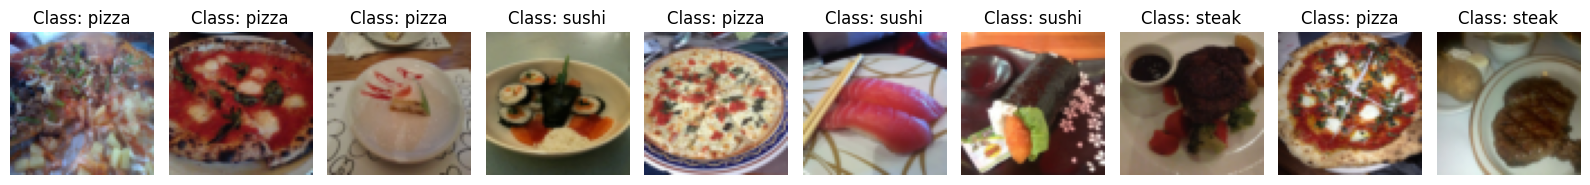

In [40]:
display_random_images(train_data, n=42, classes = class_names)

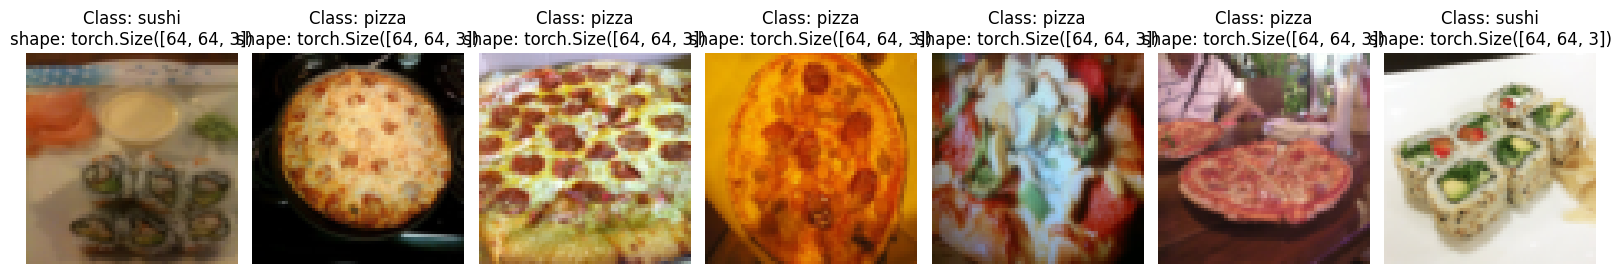

In [41]:
display_random_images(train_data_custom, n=7, classes = class_names)

#### Turn dataset into DataLoader (ie batchify)

In [42]:
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     shuffle=True,
                                     batch_size=BATCH_SIZE,
                                     num_workers=os.cpu_count()
)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                     shuffle=False,
                                     batch_size=BATCH_SIZE,
                                     num_workers=os.cpu_count()
)


In [43]:
# get image and label
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape

torch.Size([32, 3, 64, 64])

#### Other forms of transforms (data augmentation)

- artificially adding diversity to training data.

In [44]:
# let;s look at trivial gument

from torchvision import transforms

train_transform = transforms.Compose(
    (transforms.Resize(size=(222,222)),
    transforms.ToTensor(),
    transforms.TrivialAugmentWide(num_magnitude_bins=31))
)

In [45]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list

[PosixPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/648055.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/344397.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/714866.jpg'),
 PosixPath('data/pizza_steak

In [46]:
# # plot transformed images
# plot_transformed_images(
#     image_paths=image_path_list,
#     transform=train_transform,
#     n=3,
#     seed=None
# )

# Model 0 : Tiny VGG without data augmentation.

recreating the architctue from here
https://poloclub.github.io/cnn-explainer/

## Creating transforms and loading data for model 0

In [47]:
# creating a simple transform
simple_transform = transforms.Compose(
    [
        transforms.Resize(size=(64,64)),
        transforms.ToTensor()
    ]
)

In [48]:
# 1. load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(
    root = train_dir,
    transform = simple_transform,
    target_transform = None
)
test_data_simple = datasets.ImageFolder(
    root = test_dir,
    transform = simple_transform,
    target_transform = None
)

# 2. turn the datasets into DataLoaders

import os
from torch.utils.data import DataLoader

# setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# create the dataloader
train_dataloader_simple = DataLoader(
    dataset = train_data_simple,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = NUM_WORKERS
)

test_dataloader_simple = DataLoader(
    dataset = test_data_simple,
    batch_size = BATCH_SIZE,
    shuffle = False,
    num_workers = NUM_WORKERS
)



## Create tinyVGG Module class

In [49]:
from torch import nn

In [50]:
class TinyVGG(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2,
                         stride = 2) # default stride is the same as kernel size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2,
                         stride = 2) # default stride is the same as kernel size
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = 1690,
                      out_features = output_shape),
        )


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # this alternative benefits from operation fusion
        # return self.classifier(self.conv_block2(self.conv_block1(x)))


In [51]:
model_0 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = 3,
                  )

## Try a forward pass on a single image

In [52]:
# get a single image batch

image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [53]:
y = model_0(image_batch)

In [54]:
y.shape

torch.Size([32, 3])

## Using `torchinfo` to get an idea of the shapes going through a model

In [55]:
try:
    import torchinfo
except:
    %pip install -q torchinfo
    import torchinfo

In [56]:
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

## Training and test loops

* `train_step()` - takes a model and dataloader and trains the model on the dataloader

* `test_step()` - takes a model and dataloader and evaluates the model on the data loader

### loss function and optimizer function

In [57]:
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [58]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
    # put the model in train mode
    model.train()
    # set up train loss and accuracy
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        # send data to target device
        X, y = X.to(device), y.to(device)

        # 1. forward pass
        y_pred = model(X)

        # 2. calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backwards
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        # calculate accuracy metric
        y_pred_class = torch.softmax(y_pred, dim=1).argmax(dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y)

    # adjust metrics to get the average loss and accuracy per batch
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    return train_loss, train_acc




def test_step (model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device = device):

    test_loss, test_acc = 0, 0
    # put model in eval mode
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):

            # send data to target device
            X, y = X.to(device), y.to(device)

            # forward pass
            y_pred_logits = model(X)

            # calculate the loss
            loss = loss_fn(y_pred_logits, y)
            test_loss += loss.item()

            # calculate the accuracy
            y_pred_class = torch.softmax(y_pred_logits, dim=1).argmax(dim=1)
            acc = (y_pred_class == y).sum().item()/len(y)
            test_acc += acc

        # get the average accuracy and loss per batch
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)

    return test_loss, test_acc




In [59]:
model_0.train()

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [60]:
model_0.eval()

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

## creating a `train()` function mto combine `train_step()` and `test_step()`

In [61]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device = device):
    # create empty results dictionary
    results = {"train_loss": [],
               "train_acc" : [],
               "test_loss": [],
               "test_acc" : []}
    # loop through training and testing steps

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn= loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)
        # print out what's happening
        print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")

    # update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)


    # Return the filled results at the end of the epochs
    return results

## train and evaluate model 0

In [62]:
# set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set number of epochs

NUM_EPOCHS = 5

# recreate instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape = len(train_data.classes)).to(device)
# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# start the timer
from timeit import default_timer as timer
start_time = timer()

# train model 0
model_0_results = train(model_0,
                        train_dataloader_simple,
                        test_dataloader_simple,
                        optimizer,
                        loss_fn,
                        epochs=NUM_EPOCHS)

# end the timer and print out how long it took to train
end_time = timer()
print(f"Total training time: {end_time-start_time: .3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1063 | Train acc: 0.3047 | Test loss: 1.0983 | Test accuracy: 0.3011
Epoch: 1 | Train loss: 1.0998 | Train acc: 0.3281 | Test loss: 1.0697 | Test accuracy: 0.5417
Epoch: 2 | Train loss: 1.0868 | Train acc: 0.4883 | Test loss: 1.0807 | Test accuracy: 0.4924
Epoch: 3 | Train loss: 1.0843 | Train acc: 0.4023 | Test loss: 1.0608 | Test accuracy: 0.5833
Epoch: 4 | Train loss: 1.0662 | Train acc: 0.4102 | Test loss: 1.0655 | Test accuracy: 0.5644
Total training time:  7.475 seconds


In [63]:
train_dataloader_simple